# ECE-UY 4563 Final Project - Seattle Weather Prediction Using different techniques

## For starters, we need to preprocess the data

In [ ]:
# First Upload the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data from the csv

In [ ]:
data = pd.read_csv('/content/seattle-weather.csv')
data.head(5)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
df = pd.DataFrame(data)
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


## Then we are going to do the data cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
df.isna().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


So we have the result that the data is clean enough for training

In [ ]:
# Count the categories of the weather
df['weather'].value_counts()

,count
weather,
rain,641
sun,640
fog,101
drizzle,53
snow,26


So there are five categories in total

## Machine Learning Part


### First of all, let us use the logistic regression model

In [ ]:
# Target and Input variables
X = df[['precipitation','temp_max','temp_min','wind']]
y = df['weather']

In [ ]:
X,y

(      precipitation  temp_max  temp_min  wind
 0               0.0      12.8       5.0   4.7
 1              10.9      10.6       2.8   4.5
 2               0.8      11.7       7.2   2.3
 3              20.3      12.2       5.6   4.7
 4               1.3       8.9       2.8   6.1
 ...             ...       ...       ...   ...
 1456            8.6       4.4       1.7   2.9
 1457            1.5       5.0       1.7   1.3
 1458            0.0       7.2       0.6   2.6
 1459            0.0       5.6      -1.0   3.4
 1460            0.0       5.6      -2.1   3.5
 
 [1461 rows x 4 columns],
 0       drizzle
 1          rain
 2          rain
 3          rain
 4          rain
          ...   
 1456       rain
 1457       rain
 1458        fog
 1459        sun
 1460        sun
 Name: weather, Length: 1461, dtype: object)

In [ ]:
Xtr=np.array(X)
ytr=np.array(y)

In [ ]:
Xtr,ytr

(array([[ 0. , 12.8,  5. ,  4.7],
        [10.9, 10.6,  2.8,  4.5],
        [ 0.8, 11.7,  7.2,  2.3],
        ...,
        [ 0. ,  7.2,  0.6,  2.6],
        [ 0. ,  5.6, -1. ,  3.4],
        [ 0. ,  5.6, -2.1,  3.5]]),
 array(['drizzle', 'rain', 'rain', ..., 'fog', 'sun', 'sun'], dtype=object))

We implement the model with default variables

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming Xtr is the feature matrix and ytr is the target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xtr, ytr, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression(max_iter=500, solver='lbfgs', multi_class='multinomial')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.8327645051194539
Classification Report:
              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         9
         fog       0.00      0.00      0.00        25
        rain       0.94      0.93      0.94       120
        snow       1.00      0.12      0.22         8
         sun       0.76      1.00      0.86       131

    accuracy                           0.83       293
   macro avg       0.54      0.41      0.40       293
weighted avg       0.75      0.83      0.78       293



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


We plot the result

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


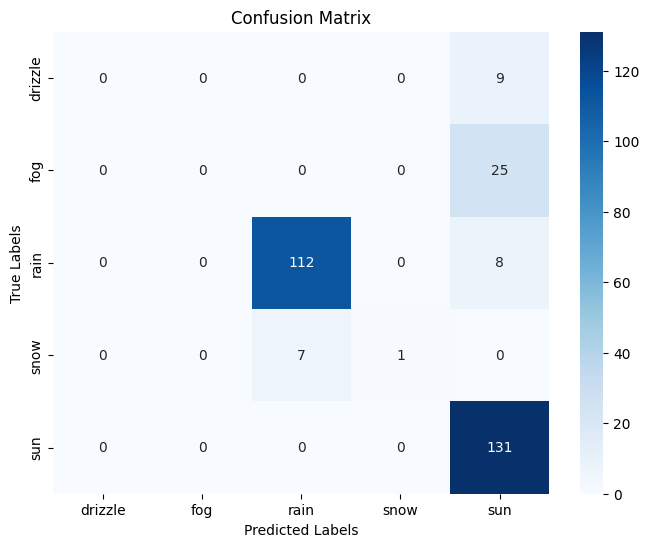

Accuracy: 0.8327645051194539

Classification Report:
              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         9
         fog       0.00      0.00      0.00        25
        rain       0.94      0.93      0.94       120
        snow       1.00      0.12      0.22         8
         sun       0.76      1.00      0.86       131

    accuracy                           0.83       293
   macro avg       0.54      0.41      0.40       293
weighted avg       0.75      0.83      0.78       293



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate results
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=model.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print results
print(f"Accuracy: {accuracy}\n")
print("Classification Report:")
print(report)

So with the default model, we have the accuracy of 0.83; and now we are going to try different C.

In [ ]:
# Experiment with different values of C and only print accuracy
C_values = [0.01, 0.1, 1, 10, 100]
accuracy_results = {}

for C in C_values:
    model = LogisticRegression(C=C, max_iter=500, solver='lbfgs', multi_class='multinomial')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store accuracy for each value of C
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[C] = accuracy
    print(f"C = {C}, Accuracy = {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


C = 0.01, Accuracy = 0.7747


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


C = 0.1, Accuracy = 0.8123


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


C = 1, Accuracy = 0.8328


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'mul

C = 10, Accuracy = 0.8328
C = 100, Accuracy = 0.8328


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Thus, the change of value C does not affect the result much